In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [3]:
%matplotlib # To ifnore writing plt.show() everytime

Using matplotlib backend: <object object at 0x7804578d2910>


In [4]:
df = pd.read_csv('data.csv')

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [10]:
df['diagnosis']=df['diagnosis'].map({'M':1, 'B':0})
corr_matrix=df.corr()
corr_matrix['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

<Axes: >

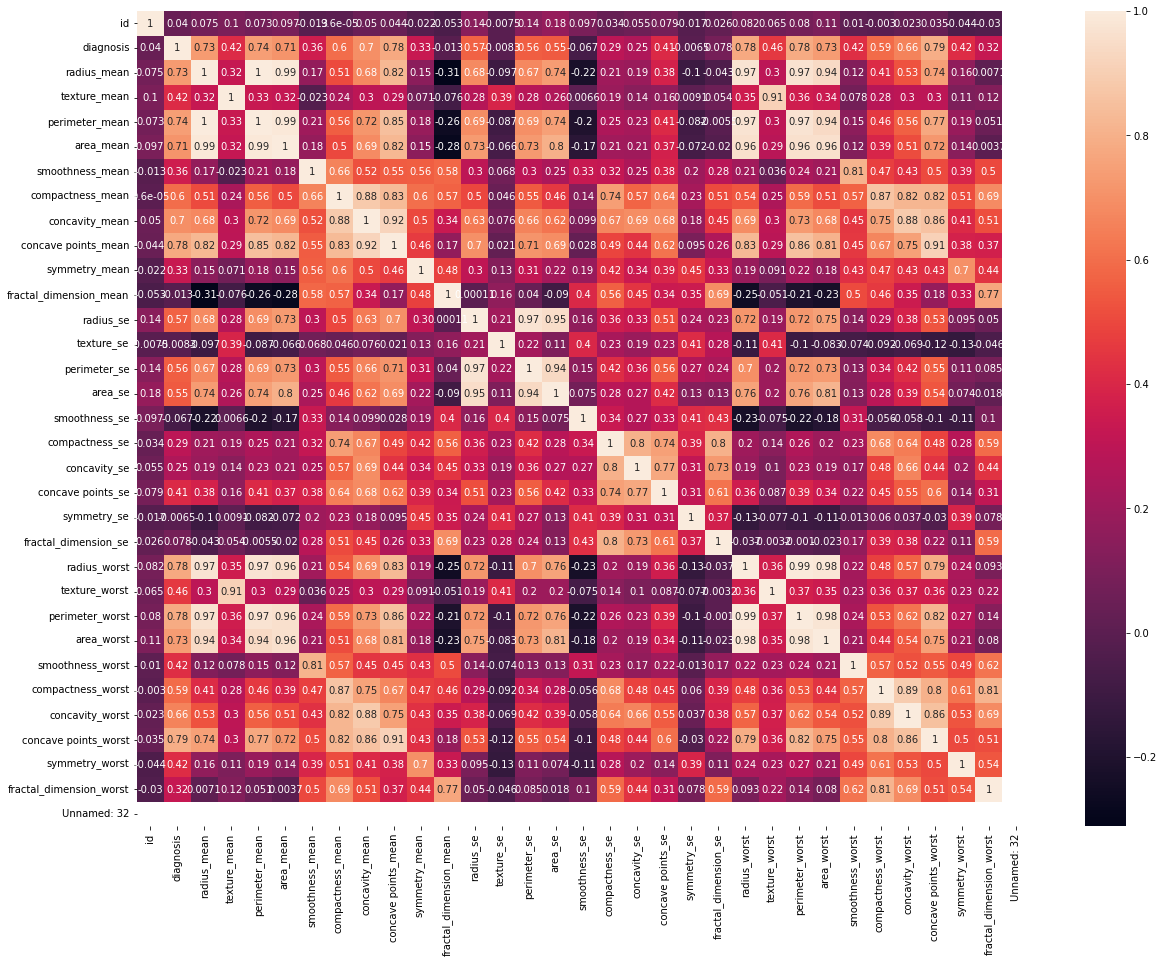

In [14]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True)

In [6]:
df['diagnosis']=df['diagnosis'].map({'M':1, 'B':0})

<Axes: >

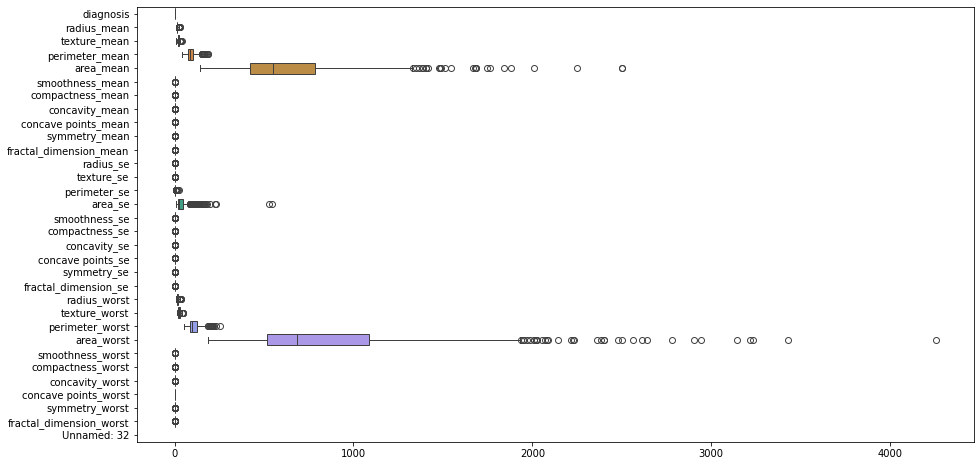

In [46]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['id']), orient='h')

In [8]:
target= df['diagnosis']

In [22]:
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [10]:
features=df.drop(columns=['diagnosis','Unnamed: 32'])

In [12]:
features= features.dropna()

In [14]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
scaled_features

array([[9.14760426e-04, 5.21037437e-01, 2.26580994e-02, ...,
        9.12027491e-01, 5.98462448e-01, 4.18863964e-01],
       [9.14996350e-04, 6.43144493e-01, 2.72573554e-01, ...,
        6.39175258e-01, 2.33589592e-01, 2.22878132e-01],
       [9.24954884e-02, 6.01495575e-01, 3.90260399e-01, ...,
        8.35051546e-01, 4.03705894e-01, 2.13433032e-01],
       ...,
       [1.00765069e-03, 4.55251077e-01, 6.21237741e-01, ...,
        4.87285223e-01, 1.28720678e-01, 1.51908697e-01],
       [1.00796562e-03, 6.44564343e-01, 6.63510315e-01, ...,
        9.10652921e-01, 4.97141731e-01, 4.52315361e-01],
       [9.22636984e-05, 3.68687586e-02, 5.01521813e-01, ...,
        0.00000000e+00, 2.57441356e-01, 1.00682146e-01]])

In [18]:
pca = PCA(n_components=2)
pca.fit(scaled_features)

PCA(n_components=2)

In [20]:
print(pca.explained_variance_ratio_)

[0.51555865 0.16794562]


In [22]:
print(pca.singular_values_)

[13.72021066  7.8307991 ]


In [24]:
x_pca=pca.transform(scaled_features)

In [26]:
x_pca

array([[ 1.38616177,  0.42939168],
       [ 0.46182811, -0.55488792],
       [ 0.95546328, -0.11080069],
       ...,
       [ 0.22585957, -0.28677719],
       [ 1.67700509,  0.33824634],
       [-0.90542531, -0.10396778]])

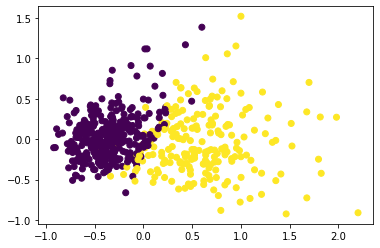

In [28]:
plt.scatter(x_pca[:,0], x_pca[:,1], c= target)

In [308]:
np.corrcoef(x_pca.T)

array([[ 1.00000000e+00, -4.13336121e-18],
       [-4.13336121e-18,  1.00000000e+00]])

In [310]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, target, test_size=0.3, random_state=1) # 70% training and 30% test

In [312]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [314]:
y_pred= clf.predict(X_test)

In [316]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9064327485380117


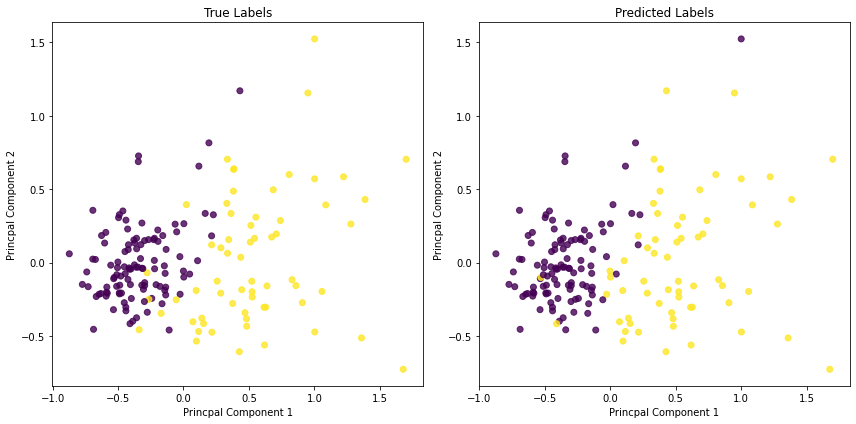

In [318]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the actual data points with true labels on the first subplot
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8, marker='o')
axes[0].set_title("True Labels")
axes[0].set_xlabel("Princpal Component 1")
axes[0].set_ylabel("Princpal Component 2")

# Plot the data points with predicted labels on the second subplot
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.8, marker='o')
axes[1].set_title("Predicted Labels")
axes[1].set_xlabel("Princpal Component 1")
axes[1].set_ylabel("Princpal Component 2")

plt.tight_layout()

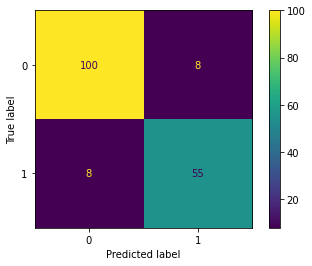

In [320]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [324]:
reg = LinearRegression().fit(X_train, y_train)

In [326]:
y_pred= clf.predict(X_test)

In [328]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9064327485380117


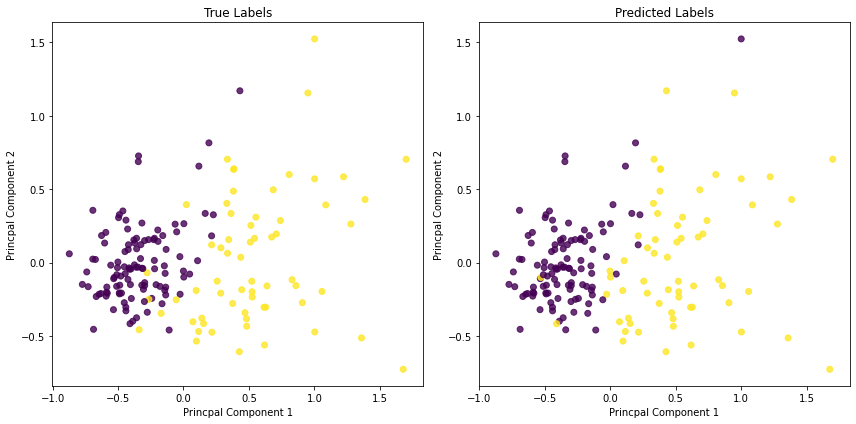

In [330]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the actual data points with true labels on the first subplot
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8, marker='o')
axes[0].set_title("True Labels")
axes[0].set_xlabel("Princpal Component 1")
axes[0].set_ylabel("Princpal Component 2")

# Plot the data points with predicted labels on the second subplot
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.8, marker='o')
axes[1].set_title("Predicted Labels")
axes[1].set_xlabel("Princpal Component 1")
axes[1].set_ylabel("Princpal Component 2")

plt.tight_layout()

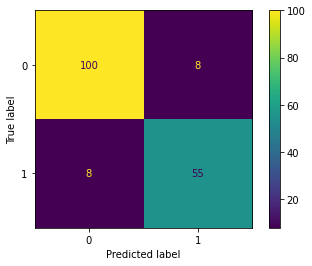

In [331]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [334]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [336]:
y_pred=clf.predict(X_test)

In [338]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9473684210526315


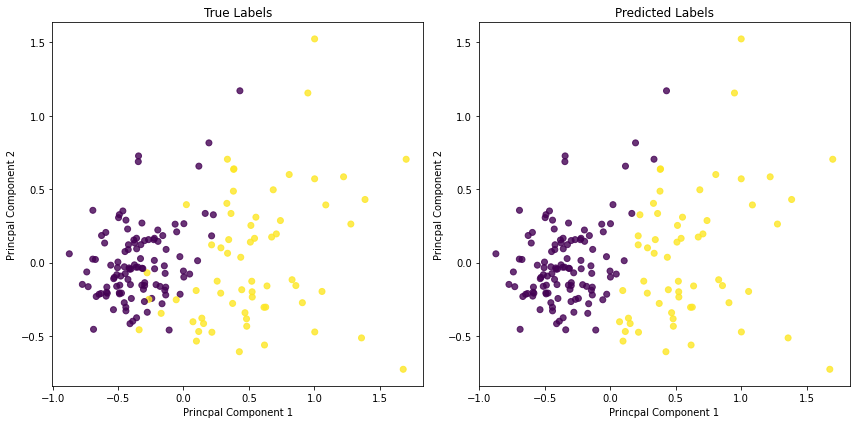

In [340]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the actual data points with true labels on the first subplot
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8, marker='o')
axes[0].set_title("True Labels")
axes[0].set_xlabel("Princpal Component 1")
axes[0].set_ylabel("Princpal Component 2")

# Plot the data points with predicted labels on the second subplot
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.8, marker='o')
axes[1].set_title("Predicted Labels")
axes[1].set_xlabel("Princpal Component 1")
axes[1].set_ylabel("Princpal Component 2")

plt.tight_layout()

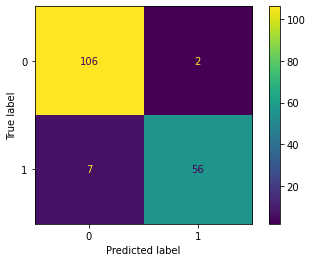

In [341]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [346]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


In [348]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9298245614035088


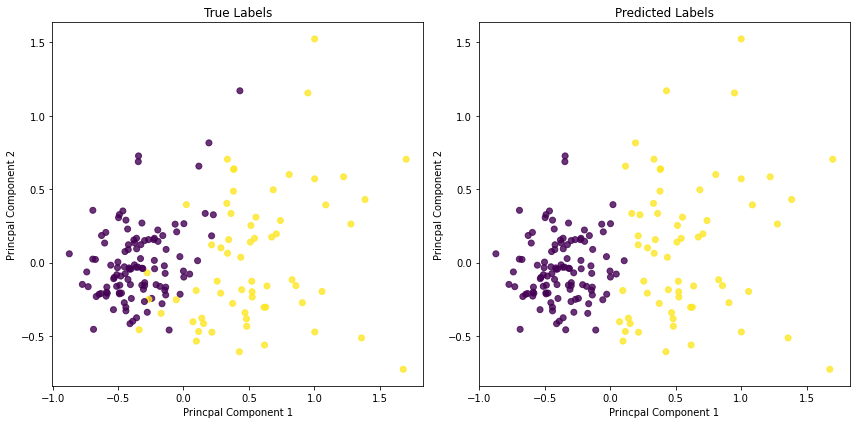

In [350]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the actual data points with true labels on the first subplot
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8, marker='o')
axes[0].set_title("True Labels")
axes[0].set_xlabel("Princpal Component 1")
axes[0].set_ylabel("Princpal Component 2")

# Plot the data points with predicted labels on the second subplot
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.8, marker='o')
axes[1].set_title("Predicted Labels")
axes[1].set_xlabel("Princpal Component 1")
axes[1].set_ylabel("Princpal Component 2")

plt.tight_layout()

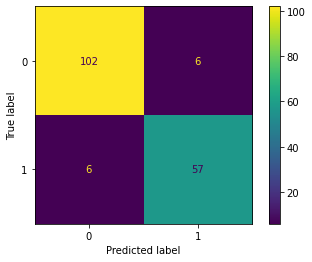

In [351]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [352]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [356]:
y_pred=clf.predict(X_test)

In [358]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9122807017543859


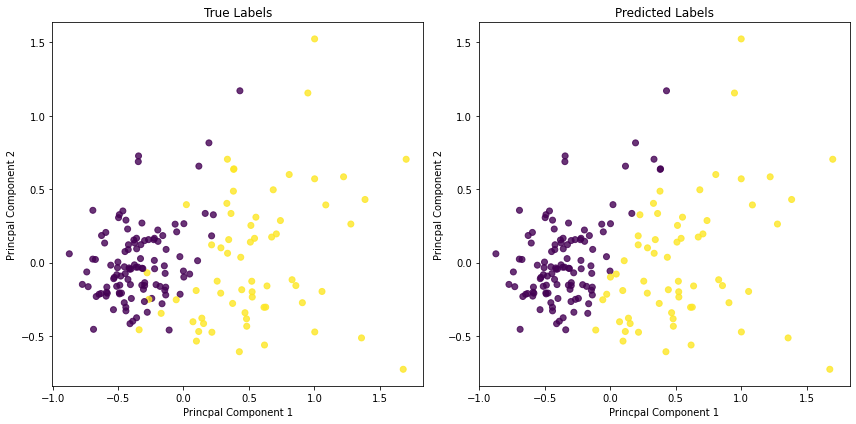

In [364]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the actual data points with true labels on the first subplot
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.8, marker='o')
axes[0].set_title("True Labels")
axes[0].set_xlabel("Princpal Component 1")
axes[0].set_ylabel("Princpal Component 2")

# Plot the data points with predicted labels on the second subplot
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', alpha=0.8, marker='o')
axes[1].set_title("Predicted Labels")
axes[1].set_xlabel("Princpal Component 1")
axes[1].set_ylabel("Princpal Component 2")

plt.tight_layout()

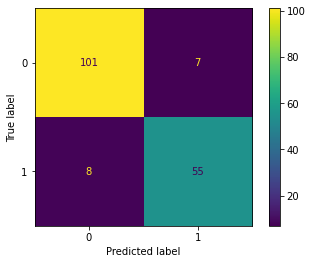

In [361]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()